In [ ]:
import os
import pickle
import numpy as np
import sys
import gvar as gv
import matplotlib.pyplot as plt

sys.path.append('../')
from b2heavy.TwoPointFunctions.fitter import CorrFitter
from b2heavy.TwoPointFunctions.types2pts import CorrelatorIO, Correlator

In [ ]:
ens      = 'Coarse-1'
data_dir = '/Users/pietro/code/data_analysis/BtoD/Alex'
meson    = 'Dsst'
mom      = '000'
binsize  = 11

In [ ]:
io = CorrelatorIO(ens,meson,mom,PathToDataDir=data_dir)
corr =  Correlator(io,jkBin=binsize)

In [ ]:
trange = (14,23)
smr = ['d-d','1S-1S','d-1S']
_, MEFF,AEFF,_,_ = corr.EffectiveCoeff(trange,smearing=smr)

In [ ]:
fitter = CorrFitter(corr,smearing=smr)
fitter.fit(
    2,
    trange,
    verbose = True,
    priors  = fitter.set_priors_phys(2,Meff=MEFF,Aeff=AEFF)
)
fitter.fit(
    3,
    trange,
    verbose = True,
    priors  = fitter.set_priors_phys(3,Meff=MEFF,Aeff=AEFF)
)
fit2 = fitter.fits[2,trange]
fit3 = fitter.fits[3,trange]

0.9711602378802262
1.8738380739989355


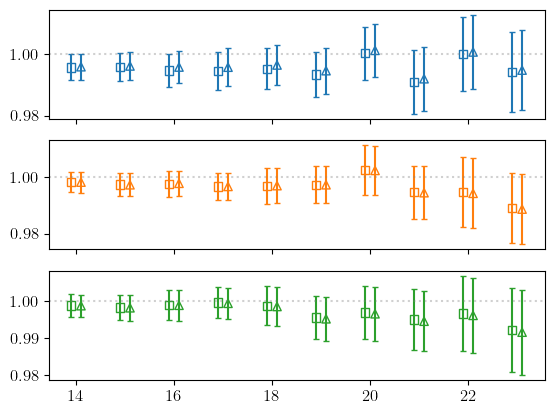

In [149]:
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12



f, ax = plt.subplots(3, 1, sharex=True)
for n,fit in enumerate([fit2,fit3]):
    yplot = fit.y/fit.fcn(fit.x,gv.mean(fit.p))
    yplot = yplot.reshape(fit.x.shape)
    yerr  = gv.sdev(np.reshape(fit.fcn(fit.x,fit.p)/fit.fcn(fit.x,gv.mean(fit.p)),fit.x.shape))

    off = (-1)**(n+1) * 0.1
    marker = 's' if n==0 else '^'

    for i,xplot in enumerate(fit.x):
        col = f'C{i}'

        ax[i].scatter(off+xplot,gv.mean(yplot[i]),marker=marker,facecolor='None',edgecolors=col)
        ax[i].errorbar(off+xplot,gv.mean(yplot[i]),yerr=gv.sdev(yplot[i]),fmt=',',color=col,capsize=2)
        # ax[i].fill_between(xplot,1-yerr[i],1+yerr[i],alpha=0.2,color=f'C{i}')

        ax[i].axhline(1.,color='gray',linestyle=':',alpha=0.2)
    
    res = np.array(fit.fcn(fit.x,fit.pmean)-gv.mean(fit.y))
    chi2red = res.T @ np.linalg.inv(gv.evalcov(fit.y)) @ res
    Ndof = len(fit.y) - len(np.concatenate(fit.p.values()))
    print(chi2red/Ndof)



In [123]:

Ndof2 = len(np.concatenate(list(fit2.x)))-len(np.concatenate(list(fit2.p.values())))
print(fit2.chi2red/Ndof2)

Ndof3 = len(np.concatenate(list(fit3.x)))-len(np.concatenate(list(fit3.p.values())))
print(fit3.chi2red/Ndof3)

0.9711899866795333
1.873310490212311


In [151]:
fit = fit3
len(np.concatenate(fit.p.values()))//3

7